In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [57]:
df = pd.read_csv("DBSCAN.csv",nrows=300)

In [58]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4,4.0,4.0,7.0,300.0,77,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8,8.0,4.0,7.0,300.0,77,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7,7.0,5.0,10.0,300.0,73,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6,6.0,11.0,11.0,300.0,72,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3,3.0,12.0,12.0,300.0,72,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,2013,3,13,7,3,8.0,21.0,40.0,600.0,69,3.7,1023.3,-10.0,0.0,NNE,2.9,Aotizhongxin
296,297,2013,3,13,8,8,18.0,35.0,62.0,700.0,69,4.8,1024.6,-13.6,0.0,NNE,3.3,Aotizhongxin
297,298,2013,3,13,9,20,24.0,27.0,43.0,600.0,69,5.5,1025.2,-10.7,0.0,ENE,3.9,Aotizhongxin
298,299,2013,3,13,10,16,25.0,22.0,32.0,500.0,69,6.4,1025.2,-11.3,0.0,ENE,2.6,Aotizhongxin


In [20]:
df_new=df.drop(['No','wd','station'], axis=1)

In [21]:
df_new.isnull().sum()

year     0
month    0
day      0
hour     0
PM2.5    0
PM10     1
SO2      2
NO2      2
CO       5
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

In [27]:
test_data = df_new[df_new['CO'].isnull()]

In [29]:
test_data

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
75,2013,3,4,3,12,34.0,6.0000,12.0000,NaN,77,7.2,1016.9,-11.6,0.0,2.8
124,2013,3,6,4,192,203.0,83.6808,140.4252,NaN,22,3.9,1007.3,-6.1,0.0,1.4
171,2013,3,8,3,324,373.0,71.0000,154.0000,NaN,84,1.8,997.9,-1.8,0.0,0.0
178,2013,3,8,10,326,844.0,125.9496,179.2269,NaN,84,19.1,1000.9,-0.4,0.0,1.9
267,2013,3,12,3,117,127.0,73.0000,81.0000,NaN,47,6.4,1005.8,-1.0,0.1,2.2


In [31]:
df_new.dropna(inplace=True)

In [37]:
X_train = df_new.drop(['CO'],axis=1)
y_train = df_new['CO']

In [40]:
y_train

0      300.0
1      300.0
2      300.0
3      300.0
4      300.0
       ...  
295    600.0
296    700.0
297    600.0
298    500.0
299    400.0
Name: CO, Length: 290, dtype: float64

In [52]:
from sklearn.model_selection import GridSearchCV
LR = {'learning_rate':[0.15,0.1,0.10,0.05], 'n_estimators':[100,150,200,250,300], 'max_depth':[1,3,5,7,9]}
tuning = GridSearchCV(estimator = GradientBoostingRegressor(),param_grid = LR,scoring='r2')
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300},
 0.6477591486004959)

In [44]:
X_test = test_data[['year','month','day','hour','PM2.5','PM10','SO2','NO2','O3','TEMP','PRES','DEWP','RAIN','WSPM']]

In [53]:
gradientregressor = GradientBoostingRegressor(max_depth=3,n_estimators=300,learning_rate=0.05)

In [54]:
model = gradientregressor.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [55]:
test_data['y_pred'] = y_pred

In [60]:
test_data

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,y_pred
75,2013,3,4,3,12,34.0,6.0000,12.0000,NaN,77,7.2,1016.9,-11.6,0.0,2.8,336.389236
124,2013,3,6,4,192,203.0,83.6808,140.4252,NaN,22,3.9,1007.3,-6.1,0.0,1.4,2530.664083
171,2013,3,8,3,324,373.0,71.0000,154.0000,NaN,84,1.8,997.9,-1.8,0.0,0.0,3857.188561
178,2013,3,8,10,326,844.0,125.9496,179.2269,NaN,84,19.1,1000.9,-0.4,0.0,1.9,4077.032574
267,2013,3,12,3,117,127.0,73.0000,81.0000,NaN,47,6.4,1005.8,-1.0,0.1,2.2,1627.893229


# END HERE

In [47]:
r2_score(y_pred,y_test)

ValueError: Found input variables with inconsistent numbers of samples: [5, 73]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [4]:
df_1 = df_new[np.isfinite(df_new).all(1)]

In [5]:
df_1.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,2013,3,1,0,4,4.0,4.0,7.0,300.0,77,-0.7,1023.0,-18.8,0.0,4.4
1,2013,3,1,1,8,8.0,4.0,7.0,300.0,77,-1.1,1023.2,-18.2,0.0,4.7
2,2013,3,1,2,7,7.0,5.0,10.0,300.0,73,-1.1,1023.5,-18.2,0.0,5.6
3,2013,3,1,3,6,6.0,11.0,11.0,300.0,72,-1.4,1024.5,-19.4,0.0,3.1
4,2013,3,1,4,3,3.0,12.0,12.0,300.0,72,-2.0,1025.2,-19.5,0.0,2.0


In [6]:
features = ['year','month','day','hour','PM2.5','PM10','SO2','NO2','O3','TEMP','PRES','DEWP','RAIN','WSPM']
X = df_1.loc[:,features]
y = df_1.loc[:,'CO']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [8]:
from sklearn.model_selection import GridSearchCV
LR = {'learning_rate':[0.15,0.1,0.10,0.05], 'n_estimators':[100,150,200,250], 'max_depth':[1,3,5,7,9]}
tuning = GridSearchCV(estimator = GradientBoostingRegressor(),param_grid = LR,scoring='r2')
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200},
 0.9127527611852969)

In [9]:
gradientregressor = GradientBoostingRegressor(max_depth=3,n_estimators=200,learning_rate=0.1)

In [10]:
model = gradientregressor.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [11]:
r2_score(y_pred,y_test)

0.9117572985428642

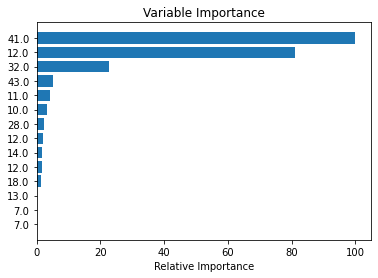

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
feature_importance = model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df_1.NO2[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()